In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from factor_analyzer import FactorAnalyzer
np.set_printoptions(suppress=True) #supress the scientific notation

In [3]:
#import data from survey
reflex = pd.read_csv(r'Data/reflex.csv', sep=';')
#filtering according to consent
reflex = reflex[reflex[
                    'Käesoleva.küsimustiku.andmeid.kasutatakse.teadustöös...Analüüsi.tulemusi.kajastatakse.teadusartiklis.anonüümselt.ja.neid.ei.edastata.kolmandatele.isikutele....Olen.nõus..et.minu.vastuseid.kasutatakse.teadustöös.'] == 'Jah']


In [4]:
len(reflex)

153

In [5]:
reflex.columns

Index(['Vastuse.ID', 'Kinnitamise.kuupäev', 'Viimane.lehekülg',
       'Alustamise.keel', 'Alustamise.kuupäev', 'Viimase.tegevuse.kuupäev',
       'IP.aadress',
       'Käesoleva.küsimustiku.andmeid.kasutatakse.teadustöös...Analüüsi.tulemusi.kajastatakse.teadusartiklis.anonüümselt.ja.neid.ei.edastata.kolmandatele.isikutele....Olen.nõus..et.minu.vastuseid.kasutatakse.teadustöös.',
       'Eesnimi', 'Perenimi',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Mul.on.olemas.vajalikud.teadmised.ja.oskused..et.ülikoolis.hakkama.saada.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ülikoolis.õppimine.on.väga.huvitav.ja.köitev.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.töötan.kõvasti.heade.akadeemiliste.tulemuste.nimel.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.olen.võimeline.saama.enamikus.ainetes.häid.tulemusi.',
       'Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Vajadusel.loobun.muudest.tegevustest.h

In [6]:
#subset the main dataframe for self-efficacy scale
self_eff = reflex.iloc[:,[10,13,15]] #only using the three statements from self-efficacy instrument

In [7]:
self_eff

,Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Mul.on.olemas.vajalikud.teadmised.ja.oskused..et.ülikoolis.hakkama.saada.,Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.olen.võimeline.saama.enamikus.ainetes.häid.tulemusi.,Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Ma.saan.hakkama.kõikide.ülikooli.ainetega.
0,üldiselt nõus,üldiselt nõus,üldiselt nõus
1,täiesti nõus,täiesti nõus,üldiselt nõus
2,täiesti nõus,täiesti nõus,ei oska öelda
3,üldiselt nõus,ei oska öelda,ei ole üldiselt nõus
4,üldiselt nõus,üldiselt nõus,ei ole sugugi nõus
...,...,...,...
148,ei ole üldiselt nõus,üldiselt nõus,täiesti nõus
149,üldiselt nõus,üldiselt nõus,ei oska öelda
150,üldiselt nõus,ei oska öelda,üldiselt nõus
151,üldiselt nõus,ei ole üldiselt nõus,ei ole sugugi nõus


In [8]:
#the columns (that is the statements) are as following
se_statements = []
for col in self_eff.columns:
    title, statement = col.split('...')
    statement = statement.strip(']')
    se_statements.append(statement)
    #print(col)
se_statements = pd.DataFrame(se_statements)
print(se_statements)

                                                   0
0  Mul.on.olemas.vajalikud.teadmised.ja.oskused.....
1  Ma.olen.võimeline.saama.enamikus.ainetes.häid....
2         Ma.saan.hakkama.kõikide.ülikooli.ainetega.


In [9]:
#lets look at the scale values to order them
#using a random column that happens to have all of the points on the scale :)
set(reflex['Palun.märgi..mil.määral.nõustud.järgmiste.väidetega...Vajadusel.loobun.muudest.tegevustest.heade.hinnete.nimel.'])

{'ei ole sugugi nõus',
 'ei ole üldiselt nõus',
 'ei oska öelda',
 'täiesti nõus',
 'üldiselt nõus'}

In [10]:
#the levels of self-efficacy scale ordered according to the questionnaire
levels_se = ['ei ole sugugi nõus','ei ole üldiselt nõus', 'ei oska öelda','üldiselt nõus','täiesti nõus']
#first, we need to convert the data from strings to floats using a dictionary
self_efficacy_replacer = {'ei ole sugugi nõus':1,
                          'ei ole üldiselt nõus':2,
                          'ei oska öelda':3,
                          'üldiselt nõus':4,
                          'täiesti nõus':5}

#rename the columns for easier use
self_eff.columns = ['eff1','eff2','eff3']
#create a new dataframe called se (self-efficacy) where the reported scale is replaced with numbers from 1 to 5
se = self_eff.replace({'eff1':self_efficacy_replacer, 'eff2':self_efficacy_replacer, 'eff3':self_efficacy_replacer})

In [11]:
#initiate
fa = FactorAnalyzer(n_factors = 1, rotation = None, method = 'ml')
#fit
fa_se = fa.fit(se)
#look at loadings
fa_se.loadings_
se_loadings = pd.DataFrame(fa_se.loadings_)
se_loadings

,0
0,0.668947
1,0.593416
2,0.627406


These loadings are beautiful. They are all bigger than 0.5 which we like. That indicates agreeing with the statements might represent a consistent variable.

In [12]:
se_statements

,0
0,Mul.on.olemas.vajalikud.teadmised.ja.oskused.....
1,Ma.olen.võimeline.saama.enamikus.ainetes.häid....
2,Ma.saan.hakkama.kõikide.ülikooli.ainetega.


In [13]:
#lets print them side-by-side to look at them in all their glory
pd.concat([se_loadings, se_statements], axis = 1)

,0,0
0,0.668947,Mul.on.olemas.vajalikud.teadmised.ja.oskused.....
1,0.593416,Ma.olen.võimeline.saama.enamikus.ainetes.häid....
2,0.627406,Ma.saan.hakkama.kõikide.ülikooli.ainetega.


# Cronbach's alpha is a measure of internal consistency

In [14]:
import pingouin as pg
#cronbach for self-efficacy instrument
pg.cronbach_alpha(data=se)

(0.6528895146151785, array([0.545, 0.738]))

0.65 is not perfect but it will have to do

In [15]:
se['score'] = se.sum(axis = 1)

In [16]:
import statistics
#lets print out some general statistics
print("The general statistics for the self-efficacy instrument are as following")
print(f"Max {max(se['score'])}")
print(f"Min {min(se['score'])}")
print(f"Standard deviation {round(np.std(se['score']),2)}")
print(f"Mean {round(np.mean(se['score']),2)}")
print(f"Mode {statistics.mode(se['score'])}")
print(f"Median {np.median(se['score'])}")
print(f"N = {len(se)}")

The general statistics for the self-efficacy instrument are as following
Max 15
Min 5
Standard deviation 1.96
Mean 11.31
Mode 12
Median 12.0
N = 153


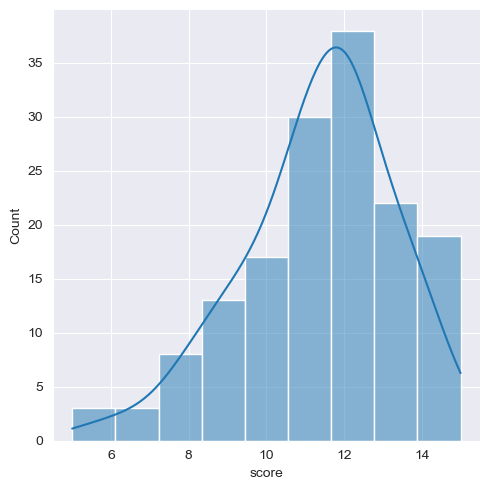

In [17]:
sns.displot(se, x = 'score', kde = True)

In [20]:
se.columns

Index(['eff1', 'eff2', 'eff3', 'score'], dtype='object')

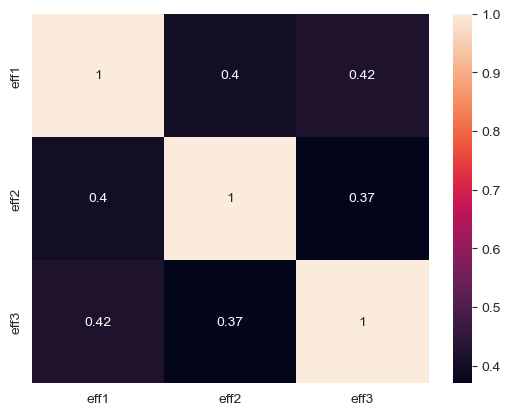

In [26]:
#lets look at the correlations between items
se_corr = se.loc[:,['eff1', 'eff2','eff3']].corr()
se_corr = round(se_corr,2)
colored_se_corr = sns.heatmap(se_corr, annot = True);
colored_se_corr
plt.show()
plt.close()

In [18]:
#take the names from the original data
names = reflex.iloc[:,-1]
#add the names to scores
se['name'] = names
#only use the scores and not individual statements
se_scores = se.loc[:,['name','score']]

In [19]:
se_scores.to_csv('se_scores.csv', index = False)